In [3]:
# -*- coding: utf-8 -*-

import os
import sys
from pprint import pprint

# root = os.path.dirname(os.path.dirname(os.path.dirname(os.path.abspath(__file__))))
# sys.path.append(root + '/python')

import ccxt  # noqa: E402



In [4]:
#Exchanges

print('CCXT Version:', ccxt.__version__)

for exchange_id in ccxt.exchanges:
    try:
        exchange = getattr(ccxt, exchange_id)()
        print(exchange_id)
        # do what you want with this exchange
        # pprint(dir(exchange))
    except Exception as e:
        print(e)

CCXT Version: 4.0.90
ace
alpaca
ascendex
bequant
bigone
binance
binancecoinm
binanceus
binanceusdm
bingx
bit2c
bitbank
bitbay
bitbns
bitcoincom
bitfinex
bitfinex2
bitflyer
bitforex
bitget
bithumb
bitmart
bitmex
bitopro
bitpanda
bitrue
bitso
bitstamp
bitstamp1
bittrex
bitvavo
bkex
bl3p
blockchaincom
btcalpha
btcbox
btcmarkets
btctradeua
btcturk
bybit
cex
coinbase
coinbaseprime
coinbasepro
coincheck
coinex
coinfalcon
coinmate
coinone
coinsph
coinspot
cryptocom
currencycom
delta
deribit
digifinex
exmo
fmfwio
gate
gateio
gemini
hitbtc
hitbtc3
hollaex
huobi
huobijp
huobipro
idex
independentreserve
indodax
kraken
krakenfutures
kucoin
kucoinfutures
kuna
latoken
lbank
lbank2
luno
lykke
mercado
mexc
mexc3
ndax
novadax
oceanex
okcoin
okex
okex5
okx
paymium
phemex
poloniex
poloniexfutures
probit
tidex
timex
tokocrypto
upbit
wavesexchange
wazirx
whitebit
woo
yobit
zaif
zonda


In [5]:
import ccxt
import pandas
import datetime
import time

ex = ccxt.kucoin()

def ohlcv_info():
    x = ex.fetch_ohlcv('BTC/USDT', '15m', limit=20)
    df = pandas.DataFrame(x, columns=['TIME', 'OPEN', 'HIGH', 'LOW', 'CLOSE', 'VOLUME'])
    df['TIME'] = pandas.to_datetime(df['TIME'], unit='ms')
    print(f'*** {datetime.datetime.now()} ***\n {df.tail(1)}\n')
    time.sleep(5)

for i in range(5):
    ohlcv_info()


*** 2023-09-12 06:16:21.651177 ***
                   TIME     OPEN     HIGH      LOW    CLOSE    VOLUME
19 2023-09-12 09:15:00  25771.8  25786.7  25771.8  25786.6  1.019204

*** 2023-09-12 06:16:28.100608 ***
                   TIME     OPEN     HIGH      LOW    CLOSE    VOLUME
19 2023-09-12 09:15:00  25771.8  25791.0  25771.8  25791.0  1.840136

*** 2023-09-12 06:16:33.424422 ***
                   TIME     OPEN     HIGH      LOW    CLOSE    VOLUME
19 2023-09-12 09:15:00  25771.8  25791.0  25771.8  25791.0  1.840136

*** 2023-09-12 06:16:38.857097 ***
                   TIME     OPEN     HIGH      LOW    CLOSE    VOLUME
19 2023-09-12 09:15:00  25771.8  25791.0  25771.8  25791.0  1.840329

*** 2023-09-12 06:16:44.388770 ***
                   TIME     OPEN     HIGH      LOW    CLOSE   VOLUME
19 2023-09-12 09:15:00  25771.8  25791.0  25771.8  25791.0  1.84081



In [8]:
binance = ccxt.binance()
print(binance.has)
binance.fetch_ohlcv('BTC/USDT', '15m', limit=20)

{'publicAPI': True, 'privateAPI': True, 'CORS': None, 'spot': True, 'margin': True, 'swap': True, 'future': True, 'option': True, 'addMargin': True, 'cancelAllOrders': True, 'cancelOrder': True, 'cancelOrders': None, 'createDepositAddress': False, 'createLimitOrder': True, 'createMarketOrder': True, 'createOrder': True, 'createPostOnlyOrder': True, 'createReduceOnlyOrder': True, 'createStopOrder': True, 'createStopLimitOrder': True, 'createStopMarketOrder': False, 'editOrder': True, 'fetchAccounts': None, 'fetchBalance': True, 'fetchBidsAsks': True, 'fetchBorrowInterest': True, 'fetchBorrowRate': True, 'fetchBorrowRateHistory': True, 'fetchBorrowRatesPerSymbol': False, 'fetchBorrowRates': False, 'fetchCanceledOrders': 'emulated', 'fetchClosedOrder': False, 'fetchClosedOrders': 'emulated', 'fetchCurrencies': True, 'fetchDeposit': False, 'fetchDepositAddress': True, 'fetchDepositAddresses': False, 'fetchDepositAddressesByNetwork': False, 'fetchDeposits': True, 'fetchFundingFee': None, 'f

[[1694493000000, 25870.0, 25899.0, 25814.8, 25819.99, 545.03139],
 [1694493900000, 25819.99, 25828.85, 25742.82, 25760.81, 735.51141],
 [1694494800000, 25760.8, 25763.49, 25631.96, 25687.58, 956.78314],
 [1694495700000, 25687.59, 25687.59, 25612.7, 25645.58, 513.10044],
 [1694496600000, 25645.59, 25750.2, 25630.0, 25706.26, 582.76974],
 [1694497500000, 25706.27, 25782.1, 25705.49, 25773.08, 417.67549],
 [1694498400000, 25773.07, 25850.53, 25737.05, 25769.12, 708.65724],
 [1694499300000, 25769.11, 25806.1, 25729.21, 25787.48, 607.59687],
 [1694500200000, 25787.47, 25799.47, 25723.27, 25751.23, 578.4018],
 [1694501100000, 25751.22, 25776.99, 25735.0, 25763.73, 460.06301],
 [1694502000000, 25763.74, 25817.37, 25730.86, 25736.42, 482.88549],
 [1694502900000, 25736.42, 25763.88, 25724.63, 25749.76, 413.32217],
 [1694503800000, 25749.76, 25818.17, 25749.76, 25811.69, 471.36509],
 [1694504700000, 25811.69, 25874.99, 25799.99, 25822.71, 662.95273],
 [1694505600000, 25822.71, 25839.26, 25789.36

In [21]:
import ccxt
import calendar
import pandas as pd
import numpy as np
from datetime import datetime, date, timedelta

binance = ccxt.binance()

def min_ohlcv(dt, pair, limit):
    # UTC native object
    since = calendar.timegm(dt.utctimetuple())*1000
    ohlcv1 = binance.fetch_ohlcv(symbol=pair, timeframe='1m', since=since, limit=limit)
    ohlcv2 = binance.fetch_ohlcv(symbol=pair, timeframe='1m', since=since, limit=limit)
    ohlcv = ohlcv1 + ohlcv2
    return ohlcv

def ohlcv(dt, pair, period='1d'):
    ohlcv = []
    limit = 1000
    if period == '1m':
        limit = 720
    elif period == '1d':
        limit = 365
    elif period == '1h':
        limit = 24
    elif period == '5m':
        limit = 288
    for i in dt:
        start_dt = datetime.strptime(i, "%Y%m%d")
        since = calendar.timegm(start_dt.utctimetuple())*1000
        if period == '1m':
            ohlcv.extend(min_ohlcv(start_dt, pair, limit))
        else:
            ohlcv.extend(binance.fetch_ohlcv(symbol=pair, timeframe=period, since=since, limit=limit))
    df = pd.DataFrame(ohlcv, columns = ['Time', 'Open', 'High', 'Low', 'Close', 'Volume'])
    df['Time'] = [datetime.fromtimestamp(float(time)/1000) for time in df['Time']]
    df['Open'] = df['Open'].astype(np.float64)
    df['High'] = df['High'].astype(np.float64)
    df['Low'] = df['Low'].astype(np.float64)
    df['Close'] = df['Close'].astype(np.float64)
    df['Volume'] = df['Volume'].astype(np.float64)
    df.set_index('Time', inplace=True)
    return df

dt = ['20180101', '20200101']
df = ohlcv(dt, 'ETH/BTC', '1d')

In [22]:
df

,Open,High,Low,Close,Volume
Time,,,,,
2017-12-31 22:00:00,0.053586,0.057200,0.053401,0.056367,312440.757
2018-01-01 22:00:00,0.056368,0.066265,0.051040,0.058261,492006.759
2018-01-02 22:00:00,0.058300,0.064210,0.056449,0.062600,469486.617
2018-01-03 22:00:00,0.062600,0.070000,0.060125,0.062236,595991.613
2018-01-04 22:00:00,0.062449,0.069758,0.054000,0.056584,710527.221
...,...,...,...,...,...
2020-12-25 21:00:00,0.025364,0.025506,0.023888,0.024055,316895.770
2020-12-26 21:00:00,0.024055,0.026500,0.022754,0.026057,732496.121
2020-12-27 21:00:00,0.026059,0.027666,0.025760,0.026967,612564.014


In [13]:
# consecutive days for ohlcv function
from datetime import datetime, date, timedelta

start_day = "20190101"
start_dt = datetime.strptime(start_day, "%Y%m%d")
end_day = "20190831"
end_dt = datetime.strptime(end_day, "%Y%m%d")
days_num = (end_dt - start_dt).days + 1
datelist = [start_dt + timedelta(days=x) for x in range(days_num)]
datelist = [date.strftime("%Y%m%d") for date in datelist]

df = ohlcv(datelist, 'BTC/USDT', '1d')

# hourly ETH/BTC ohlcv data between Jan 2019 and Aug 2020 from crypto exchange
#df.to_csv('data/eth_btc_1hour_2018JanTo2020Aug.csv')

In [20]:
len(df.index.unique())

607

<AxesSubplot:xlabel='Time'>

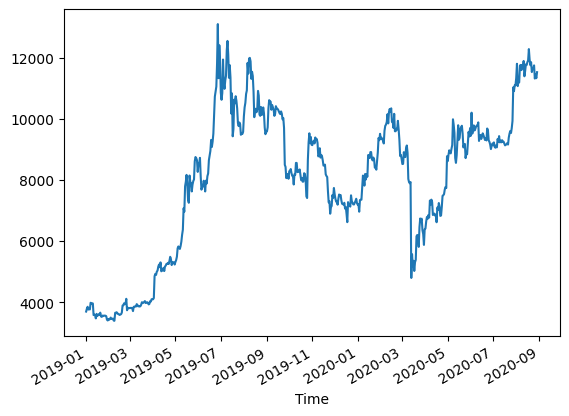

In [15]:
df["Open"].plot()

In [ ]:
# consecutive days for ohlcv function
from datetime import datetime, date, timedelta

start_day = "20170801"
start_dt = datetime.strptime(start_day, "%Y%m%d")
end_day = "20190831"
end_dt = datetime.strptime(end_day, "%Y%m%d")
days_num = (end_dt - start_dt).days + 1
datelist = [start_dt + timedelta(days=x) for x in range(days_num)]
datelist = [date.strftime("%Y%m%d") for date in datelist]

df = ohlcv(datelist, 'BTC/USDT', '1d')

# hourly ETH/BTC ohlcv data between Jan 2019 and Aug 2020 from crypto exchange
#df.to_csv('data/eth_btc_1hour_2018JanTo2020Aug.csv')